In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# I suggest you to see this channel to understand the theory of Desicion Trees
# https://www.youtube.com/watch?v=g9c66TUylZ4

In [2]:
# Importing the dataset
boston = datasets.load_boston()
# The information Boston is organized as a dictionary
# In order to view their information we call the keys
print(boston.keys())
# The dimensions of our dataset
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:

# The columns are stored in 'feature_names'
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
# Our independent values are stored in 'RM'(rooms)
X_adr = boston.data[:,np.newaxis,5]

In [0]:
y_adr = boston.target

Text(0.5, 1.0, 'Number of rooms vs House Price')

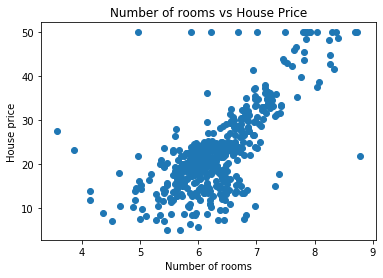

In [10]:
# Ploting to see the relation
plt.scatter(X_adr,y_adr)
plt.xlabel('Number of rooms')
plt.ylabel('House price')
plt.title('Number of rooms vs House Price')

In [0]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size= 0.2)

In [0]:
# Calling the tree model
# max_depth = 5 to avoid overfitting

adr = DecisionTreeRegressor(max_depth=5) 

In [17]:
# Training the model
adr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
# Predicting the model
y_pred = adr.predict(x_test)

<function matplotlib.pyplot.show>

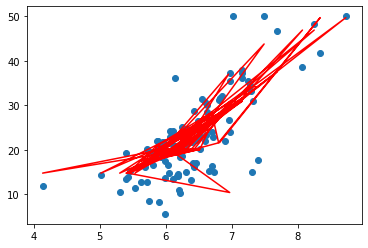

In [19]:
# Plotting the model
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.show

The graph of the model is not the best, let's fix it.

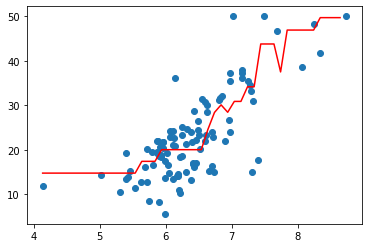

In [22]:
# First we use arrange to space the data
# in the interval of max and min of the test data
# the space for that is 0.1
# Finally, we reshape the data in order to plot it
X_grid = np.arange(min(x_test),max(x_test),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color = 'red')
plt.show()

In [26]:
# Presenting the model in a mathematical form
R = adr.score(x_train,y_train)
print('R ²   = ',R)

R ²   =  0.679085817955158


First, this model doesn't have an intercept or coef, because is a tree and it calculates parameters for each branch. Finally, the R score has a good values, means that the model predicts well the house price.

In [29]:
# A simple prediction for 1 value when x = 5
x1 = 5
x_new = np.array(x1).reshape(1,-1)
j_p = adr.predict(x_new)
j_p

array([14.75641026])